# Практика

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats]
(https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [4]:
# ваш код тут
# например вот такое распределение https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cosine.html#scipy.stats.cosine
my_scale = 0.7
my_loc = 2.02
rv_laplace = sts.laplace(scale=my_scale, loc=my_loc)
sample = pd.DataFrame(rv_laplace.rvs(size=1000))
sample

,0
0,6.306432
1,2.283733
2,2.343104
3,2.266576
4,4.147101
...,...
995,0.096478
996,2.234553
997,5.106371
998,3.793432


In [5]:
real_mean = rv_laplace.mean() # настоящее среднее случайной величины
real_mean

2.02

In [6]:
real_var = rv_laplace.var()
real_var# настоящая дисперсия случайной величины

0.9799999999999999

### Постройте гистограмму выборки и теоретическую плотность распределения

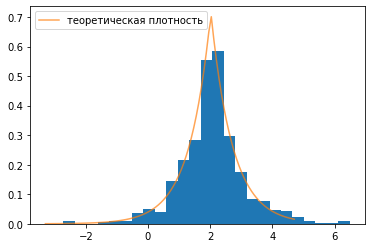

In [7]:
# ваш код тут
plt.hist(sample, bins=25, density=True)
x = np.linspace(-3.3,4.7,100)
pdf = rv_laplace.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=my_scale)
plt.legend()

In [8]:
sample_mean = sample.mean() # выборочное среднее
print(sample_mean)
sample_dispersia = sample.var() # выборочная дисперсия
print(sample_dispersia)

0    2.060437
dtype: float64
0    1.099493
dtype: float64


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных
средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии
(не приближенные на основе выборки).

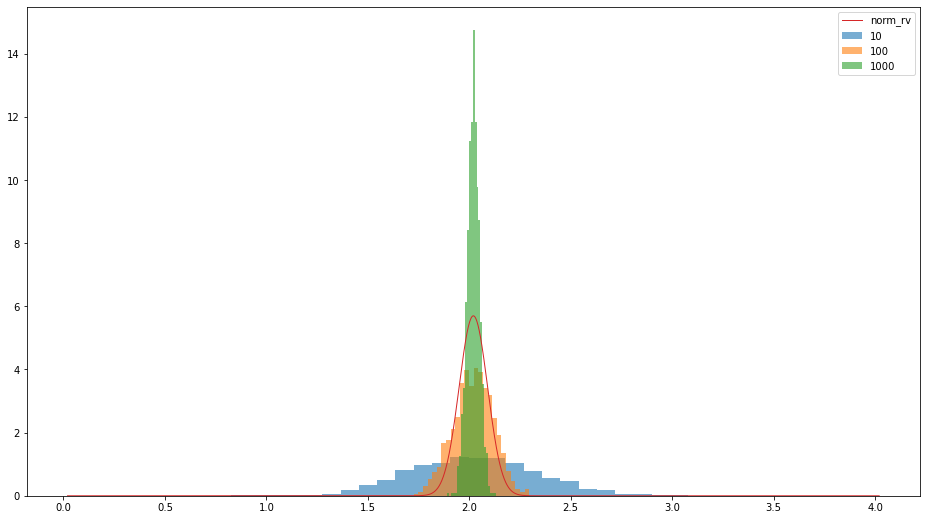

In [23]:
plt.figure(figsize=(16,9))
rv_laplace = sts.laplace(scale=my_scale, loc=my_loc)
# количество выборочных средних
k = 1000
# ваш код тут
# размеры выборки СВ
sample_size = [10, 100, 1000, ]
for n in sample_size:
    means_rv = []
    for m in range(k):
        # генерируем 1000 выборочных средних величин с выборкой размера n
        means_rv.append(sts.laplace(scale=my_scale, loc=my_loc).rvs(n).mean())
    # строим гистограмму распределения
    plt.hist(means_rv, bins=25, density=True, alpha=0.6)
x = np.linspace(-2+my_loc, 2+my_loc, 10000)
rv_norm = sts.norm(scale=0.7/np.sqrt(100), loc=my_loc)
# 0.7/np.sqrt(100)
plt.plot(x, rv_norm.pdf(x), linewidth=1)
plt.legend(['norm_rv', '10', '100', '1000'])
plt.show()

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:**
при увеличении размера выборки выборочных средних график распределения сужается

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total
day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел).

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [ ]:
df_tel = pd.read_csv('C:\\Users\\iKerng\\Python\\School_DA\\TViMS_for_DA\\Lesson3\\telecom_churn.csv')
df_tel_true = df_tel[df_tel['churn'] == True].copy()
df_tel_false = df_tel[df_tel['churn'] == False].copy()


tel_mean_true = df_tel_true['total day calls'].mean()
tel_mean_false = df_tel_true['total day calls'].mean()


# обозначим размер выборки 50 символов
N = 50
# создадим список выборочных средних из 1000 элементов следующим образом:
k = 1000
# случайным образом будем отбирать из генеральной выборки по 50 элементов и находить среднее значение этих 50 элементов
# всего мы будем это проделывать 1000 раз
sample_mean_true = [np.mean(np.random.choice(df_tel_true['total day calls'], N)) for i in range(k)]
sample_mean_false = [np.mean(np.random.choice(df_tel_false['total day calls'], N)) for i in range(k)]


interval_true = [np.mean(sample_mean_true) + sts.norm.ppf(0.025)*np.std(sample_mean_true, ddof=1)
                 / np.sqrt(len(sample_mean_false)),
 np.mean(sample_mean_true) - sts.norm.ppf(0.025)*np.std(sample_mean_true, ddof=1)
                 / np.sqrt(len(sample_mean_false))]

interval_false = [np.mean(sample_mean_false) + sts.norm.ppf(0.025)*np.std(sample_mean_false, ddof=1)
                  / np.sqrt(len(sample_mean_false)),
 np.mean(sample_mean_false) - sts.norm.ppf(0.025)*np.std(sample_mean_false, ddof=1)
                  / np.sqrt(len(sample_mean_false))]

print('Доверительный интервал для ушедших лежит в промежутке ' + str(interval_true))
print('Доверительный интервал для оставшихся лежит в промежутке ' + str(interval_false))